# sklearn tutorial
http://amueller.github.io/sklearn_tutorial

In [67]:
from sklearn.datasets import load_digits
digits = load_digits()

In [68]:
print("images shape:%s" % str(digits.images.shape))
print("targets shape:%s" % str(digits.target.shape))

images shape:(1797, 8, 8)
targets shape:(1797,)


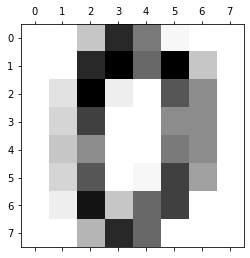

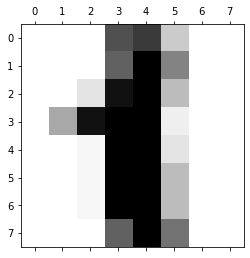

In [69]:
plt.matshow(digits.images[0], cmap=plt.cm.Greys)
plt.matshow(digits.images[1], cmap=plt.cm.Greys)

In [70]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [71]:
X = digits.data.reshape(-1, 64)
print(X.shape)

(1797, 64)


In [72]:
Y = digits.target
print(Y.shape)

(1797,)


In [73]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=2)

In [76]:
pca.fit(X)

PCA(n_components=2)

In [77]:
X_pca = pca.transform(X)
X_pca.shape

(1797, 2)

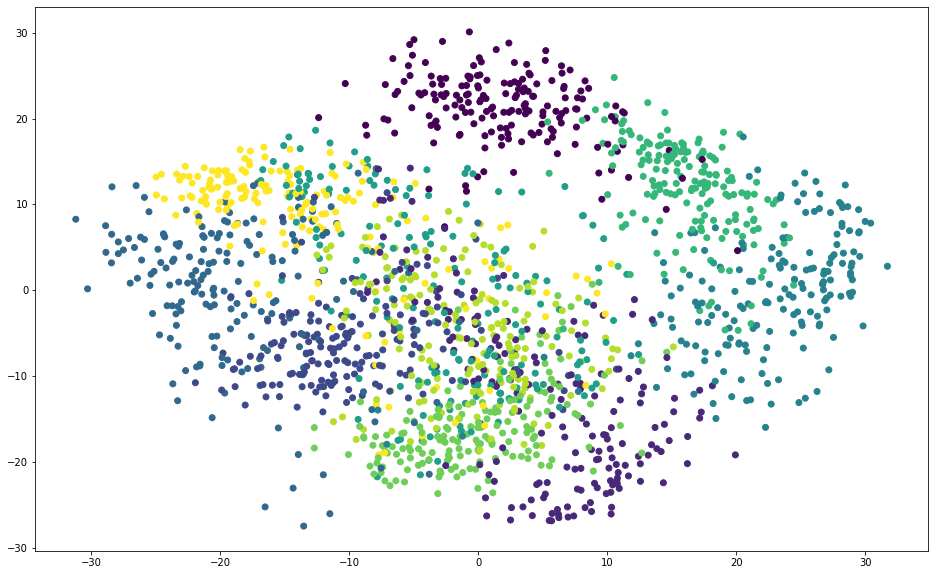

In [78]:
plt.figure(figsize=(16, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y)

In [79]:
print(pca.mean_.shape)
print(pca.components_.shape)

(64,)
(2, 64)


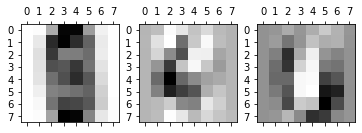

In [80]:
fix, ax = plt.subplots(1,3)
ax[0].matshow(pca.mean_.reshape(8, 8), cmap=plt.cm.Greys)
ax[1].matshow(pca.components_[0,:].reshape(8, 8), cmap=plt.cm.Greys)
ax[2].matshow(pca.components_[1,:].reshape(8, 8), cmap=plt.cm.Greys)


In [81]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2, n_neighbors=20)
isomap.fit(X);
X_isomap = isomap.transform(X)
X_isomap.shape

(1797, 2)

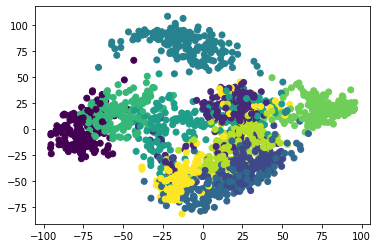

In [82]:
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=Y);

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [84]:
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (1347, 64)
y_train shape: (1347,)
X_test shape: (450, 64)
y_test shape: (450,)


In [85]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train);
svm.predict(X_train)

array([2, 8, 9, ..., 7, 7, 8])

In [86]:
svm.score(X_train, y_train)

0.994060876020787

In [87]:
svm.score(X_test, y_test)

0.9311111111111111

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train);
rf.score(X_train, y_train)

1.0

In [89]:
rf.score(X_test, y_test)

0.9733333333333334

In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=5)
print("scores: %s mean: %f std: %f" % (str(scores), np.mean(scores), np.std(scores)))

scores: [0.97777778 0.97407407 0.97026022 0.97026022 0.97769517] mean: 0.974013 std: 0.003344


In [91]:
rf2 = RandomForestClassifier(n_estimators=50)
scores = cross_val_score(rf2, X_train, y_train, cv=5)
print("scores: %s  mean: %f  std: %f" % (str(scores), np.mean(scores), np.std(scores)))

scores: [0.96296296 0.97407407 0.97026022 0.95910781 0.96654275]  mean: 0.966590  std: 0.005265


In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': 10.** np.arange(-3, 4)}
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=3, verbose=3, return_train_score=True)
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.990, test=0.951), total=   0.1s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.983, test=0.964), total=   0.1s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.983, test=0.971), total=   0.0s
[CV] C=0.01 ..........................................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[CV] .......... C=0.01, score=(train=0.996, test=0.951), total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.997, test=0.953), tot

In [93]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.001}
0.9621380846325166
